# Plot Customization with Matplotlib

So far we have used the plotting interface available from Pandas `Series`. While this offers lots of useful functionality we would like to have a more fine-grained control over the appearance of our plots. 

Pandas conventionally wraps Matplotlib as a plotting backend. Indeed, when calling the [`.plot()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.html) method on a `Series` object a Matplotlib [`Axes`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.html) object is returned. This has many "knobs" allowing us to fine-tune the appearance of a particular plot.

:::{note} Below we will discuss some example use cases of the Matplotlib's object-oriented API. Please do not expect a complete treatment of a functionalities in this section. Clearly, this would be out-of-scope for this course. We rather want to understand the basic principles of working with this type of API and to know the customization points. For a more detailed overview we refer you to Matplotlib's [example gallery](https://matplotlib.org/stable/gallery/index.html).
:::

As usual we start with some imports.

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

mpl.style.use("seaborn-v0_8-colorblind")

f"Pandas version: {pd.__version__ = }, Numpy version: {np.__version__ = }"

"Pandas version: pd.__version__ = '2.1.1', Numpy version: np.__version__ = '1.26.0'"

## Customizing plots

Let's return to our [initial example](creating-an-appropriate-plot) for generating a plot. We created a bar plot of some ficticious data containing several items (categories).

In [2]:
rng = np.random.default_rng(seed=42)

In [3]:
import itertools
import string

s = pd.Series(
    data=itertools.chain.from_iterable(
        [letter] * rng.choice(range(1, 10))
        for idx, letter in enumerate(string.ascii_letters[:10])
    ),
)

We have noted ealier that calling the `.plot()` method returns an `Axes` object. Therefore, we assign the output to a variable names `ax.` Indeed, this is the commonly chosen name for such kind of objects when working with Matplotlib. 

The thus generated plot is still requires some customization. While we could use suitable arguments for the `.plot()` method (in practice we would do so!) --- or the `.bar()` method in this example --- we will call appropriate methods available for `Axes` object to conduct the customization like setting the title, or adding axis labels.

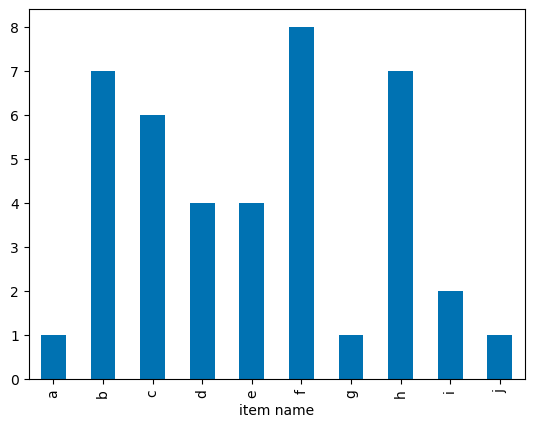

In [4]:
ax = (
    s
    .value_counts()
    .sort_index()
    .plot.bar(xlabel="item name")
)

We quickly check for the type of `ax`.

In [5]:
type(ax)
# ax.get_xlabel()

matplotlib.axes._axes.Axes

Now we repeat the plot and add 

* a title,
* axis labels, and 
* horizontal grid lines.

The `ax` object effectively provides us with a handle to the plot (the x- and the y-axis, in particular). We cite from the [Matplotlib manual](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.html)

> An Axes object encapsulates all the elements of an individual (sub-)plot in a figure.

As we see below there are some `get`ter and `set`ter methods available to for instance set labels for the axes or manipulating the labels for the ticks along the x-axis. 

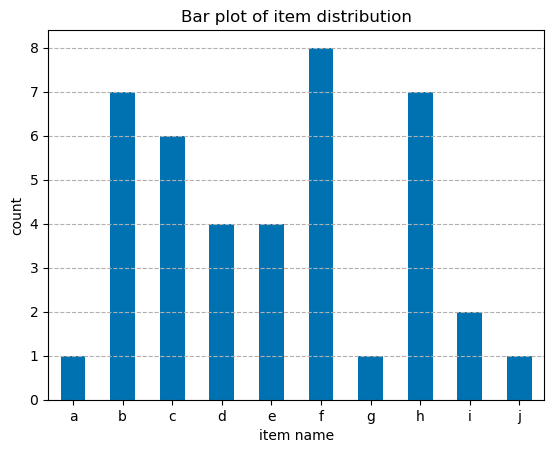

In [6]:
ax = s.value_counts().sort_index().plot.bar()

# Title
ax.set_title("Bar plot of item distribution")

# Axis labels
ax.set_xlabel("item name")
ax.set_ylabel("count")

# Grid - we limit ourselves to horizontal grid lines for the y-values
ax.grid(which="major", axis="y", linestyle="--")

# Customize the tick labels to have to rotation of names
ax.set_xticks(
    ax.get_xticks(),       # position of ticks
    ax.get_xticklabels(), # ticks labels
    rotation=0,
);

While most of the method calls should be straight-forward to understand, the call to `.set_xticks()` requires some explanation: The purpose of calling this method is to rotate the labels of the ticks on the x-axis. The method expects the tick-positions in a sequence container (e.g. a `list` or a `np.ndarray`) and the labels e.g. as a `list`. During the call to `.bar()` these positions and labels have already been created; we just want to *customize* their appearance. Therefore, we call the `get`methods `.get_xticks()` and `.get_xticklabels()` that return us the currently set positions and labels.  

In [7]:
# Fill the gap!

These are passed are arguments to the `.set_xticks()` method; the only thing left to do is to specify the `rotation` parameter.

## Subplots

Oftentimes we want certain pieces of information to be visualized side-by-side. To achieve this we can use subplots embedded within a Matplotlib [`Figure`](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure).

A grid of subplots can be conveniently created with the [`plt.subplots()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html) function.

```python
>>> fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
```
In this example we create a 1 x 2 layout (1 row, 2 columns); the return value is a `tuple` containing a `Figure` object and a `np.ndarray` (possibly nested) of `Axes` instances. Here the size of the NumPy array containing the `Axes` objects is 2, so it is instructive to use `tuple` unpacking to assign individual names to the single instances. The width and the height of the canvas on which the plots will be drawn is specified with the `figsize` parameters: `( width, height )`.

Below we revisit the example from an earlier [exercise](exercise-plotting-normalised-item-counts) in which you were asked to plot the relative proportions of items. The left plot (references by `ax1`) contains a bar chart with normalized item counts, while the right plot (references by `ax2`) contains a pie chart. Note how the labels and the values of the proportions have been customized in the plot.


<Axes: title={'center': 'Pie chart of normalized item counts'}>

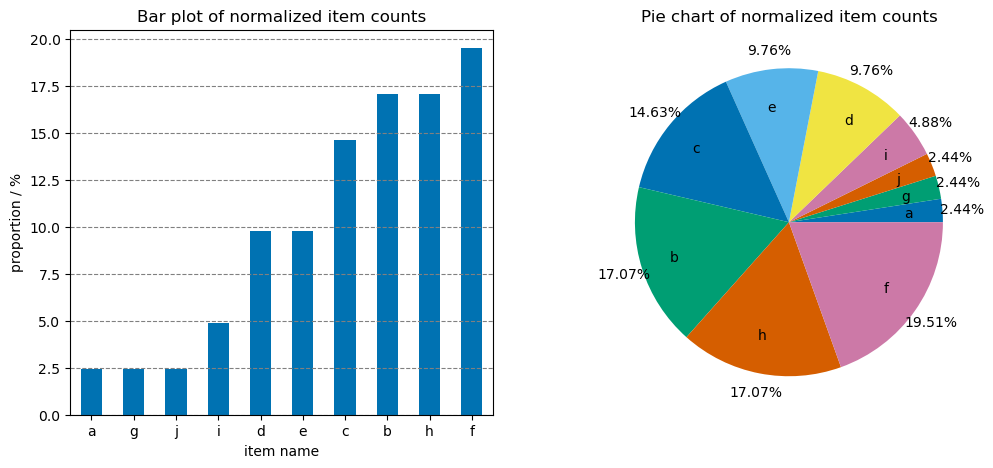

In [8]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

(
    s.value_counts(normalize=True)
    .sort_values()
    .mul(100)
    .plot.bar(
        ax=ax1,
        title="Bar plot of normalized item counts",
        xlabel="item name",
        ylabel="proportion / %",
        rot=0,
    )
)
ax1.grid(which="major", axis="y", linestyle="--", color="grey")

(
    s.value_counts(normalize=True)
    .sort_values()
    .mul(100)
    .plot.pie(
        ax=ax2,
        title="Pie chart of normalized item counts",
        ylabel="",
        # show properties of labels and customize their positions
        autopct=lambda x: f"{x:.2f}%",
        pctdistance=1.125,
        labeldistance=0.75
    )
)

Another way to design the layout of a figure with multiple subplots is the [`.subplot_mosaic()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot_mosaic.html) function. We will not discuss every detail of the code below. What is shown is a so-called scatter plot which basically just plotting $(x, y)$ pairs of data. This plot is shown as dots below. Additionally, there are two histogram attached at the top and right of the scatter plot. The top plot show the distribution of the $x$ values, while that on the right show the distribution of the $y$ values.

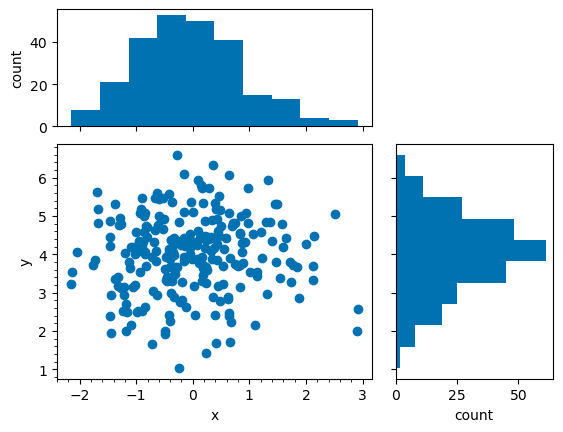

In [9]:
fig, axes = plt.subplot_mosaic(
    [
        ["histogram-x", "."],
        ["scatterplot", "histogram-y"],
    ],
    width_ratios=[2, 1],
    height_ratios=[1, 2],
    gridspec_kw={"hspace": 0.1, "wspace": 0.1},
)

(
    x_values,
    y_values,
) = (
    rng.normal(size=250),
    rng.normal(loc=4, size=250),
)

# Scatter plot in the middle
ax = axes["scatterplot"]
ax.minorticks_on()
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.scatter(x_values, y_values)
# ax.grid()

# Histogram on the right-hand side
ax = axes["histogram-y"]
ax.set_yticklabels([])
ax.set_xlabel("count")
ax.hist(y_values, orientation="horizontal")

# Histogram at the top
ax = axes["histogram-x"]
ax.set_xticklabels([])
ax.set_ylabel("count")
ax.hist(x_values, bins=10);

### Exercises

#### Sine functions with phase shift

Create a single plot with four sine functions, each have a different phase $\phi$ in the range $[-2\pi, 2\pi]$:

$$
f(x) = \sin(x - \phi)
$$

Use angles $\phi = 0, \pi / 3, \pi / 2, \pi$. For each sine function set the linestyle as well as the color manually. Search the [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) of the `.plot()` function to find the right options to conduct these customizations. Make sure that each line can be associated with a particular phase shift.

*Hints*:

* Use the [`np.linspace`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) function to generate the range of x-values.
* Compute each sine with a [NumPy function](https://numpy.org/doc/stable/reference/routines.math.html).

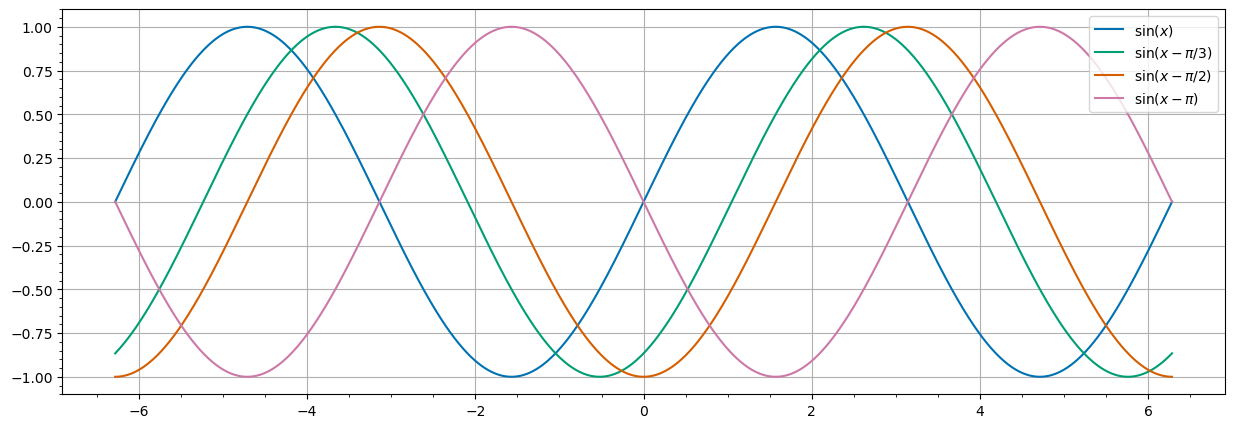

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

x_values = np.linspace(-2 * np.pi, 2 * np.pi, 1001)

ax.grid()
ax.minorticks_on()

for phi, label in zip(
    [0, np.pi / 3, np.pi / 2, np.pi], 
    [r"$\sin(x)$", r"$\sin(x - \pi/3)$", r"$\sin(x - \pi/2)$", r"$\sin(x - \pi)$"],
    # ["red", "blue", "orange", "magenta"],
):
    ax.plot(x_values, np.sin(x_values - phi), label=label)
# ax.plot(x_values, np.sin(x_values - np.pi / 3), label=r"$\sin(x - \pi/3)$")
# ax.plot(x_values, np.sin(x_values - np.pi / 2), label=r"$\sin(x - \pi/2)$")
# ax.plot(x_values, np.sin(x_values - np.pi), label=r"$\sin(x - \pi)$")
# ax.grid()

ax.legend()

#### Sine functions with phase shift in subplots

Plot the same sine functions as in the previous exercise but now plot each of the functions in a *separate* subplot in a 4x1 plot grid. Assure that all subplots have the same x-scale and y-scale. The values on the x-axis shall be in degree units.

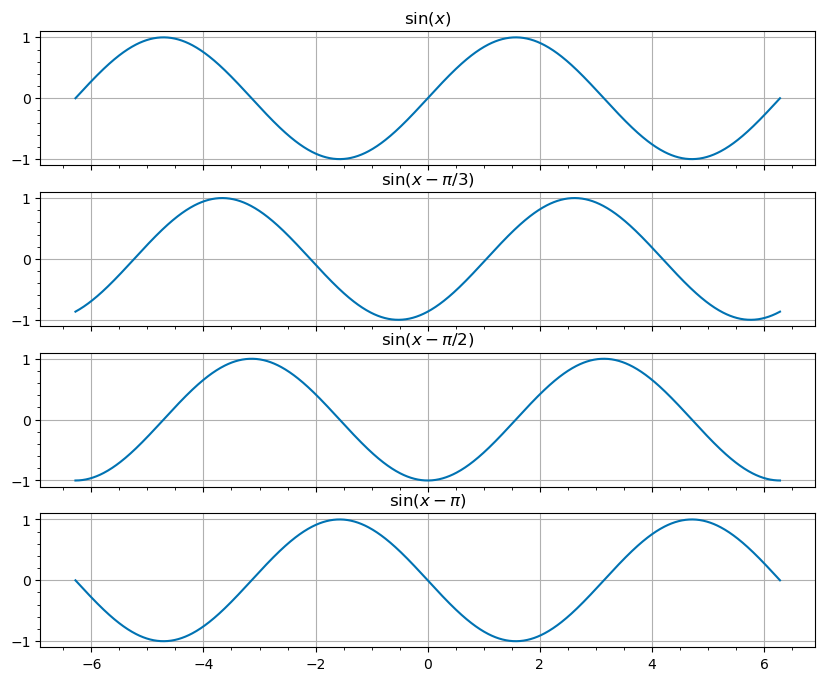

In [11]:
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

x_values = np.linspace(-2 * np.pi, 2 * np.pi, 1001)

for phi, label, ax in zip(
    [0, np.pi / 3, np.pi / 2, np.pi], 
    [r"$\sin(x)$", r"$\sin(x - \pi/3)$", r"$\sin(x - \pi/2)$", r"$\sin(x - \pi)$"],
    axes,
):
    ax.grid()
    ax.minorticks_on()    
    # ax.plot(x_values, np.sin(x_values - phi), label=label)
    ax.plot(x_values, np.sin(x_values - phi))
    ax.set_title(label)


#### Poll revisited

We revisit the [exercise](series-operations-exercise-poll) dealing with the (ficticous) poll. The data is reproduced with some variations below.

Generate two plots side-by-side that show *one* of the following (you choose!):

* The counts of each category from the *uncleaned* dataset on the left and the counts of each category in *cleaned* dataset on the right.
* The relative proportions of the categories from the *uncleaned* dataset on the left and the relative proportions from the uncleaned dataset on right.

Depending on what kind visualization form you use, choose an appropriate plot.

In [12]:
rng = np.random.default_rng(seed=42)

data = np.array(
    ["Employed"] * rng.choice(range(2000, 5000))
    + ["employed"] * rng.choice(range(100, 500))
    + ["Unemployed"] * rng.choice(range(200, 400))
    + ["unemployed"] * rng.choice(range(50, 70))
    + ["Rate mal"] * rng.choice(range(10, 20))
    + ["Having fun all day"] * rng.choice(range(50, 100))
    + ["geht dich nix an"] * rng.choice(range(20, 60))
)
rng.shuffle(data)

poll = pd.Series(data=data)
poll

0         Employed
1         Employed
2         employed
3       Unemployed
4         Employed
           ...    
3188      Employed
3189      Employed
3190      Employed
3191      Employed
3192      Employed
Length: 3193, dtype: object

<Axes: title={'center': 'With cleaning'}>

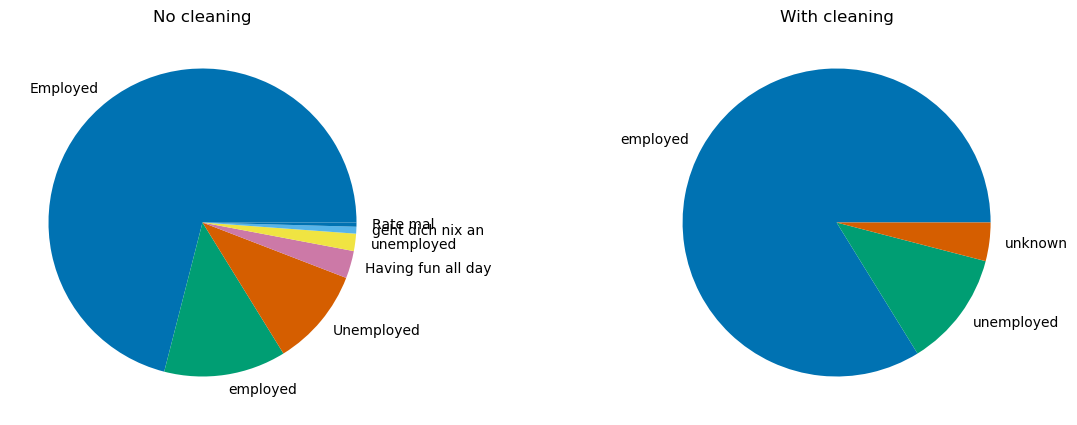

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

(
    poll
    .value_counts(normalize=True)
    .plot.pie(
        ax=ax1,
        title="No cleaning",
        xlabel="", ylabel="",
    )
)


(
    poll.str.lower()
    .where(lambda s: s.str.endswith("ployed"), "unknown")
    .value_counts(normalize=True)
    .plot.pie(
        ax=ax2,
        title="With cleaning",
        xlabel="", ylabel="",
    )
)

<Axes: title={'center': 'With cleaning'}>

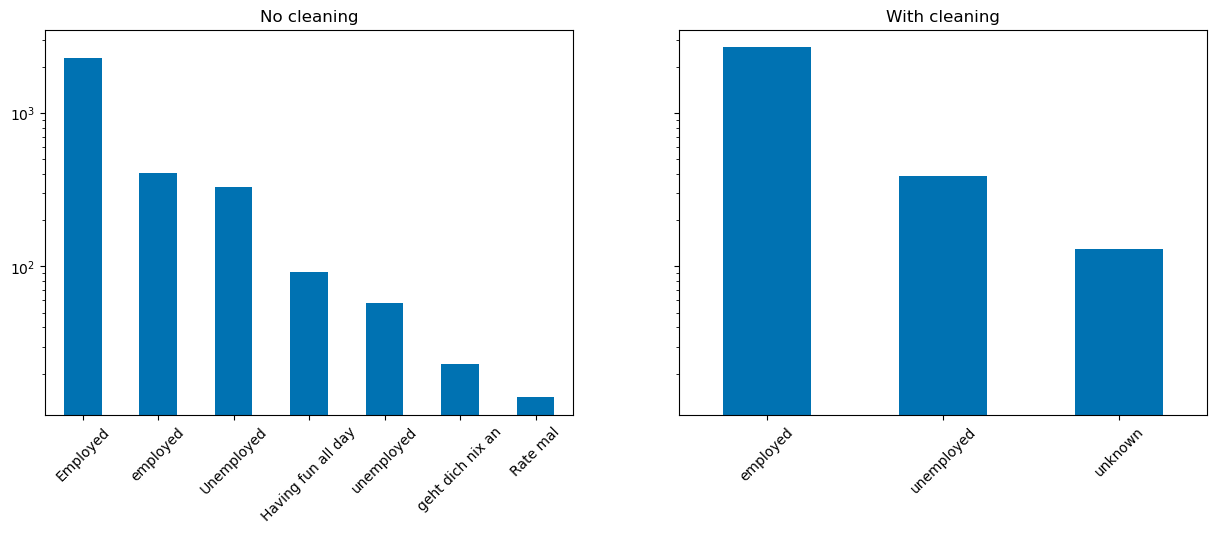

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

(
    poll
    .value_counts()
    .plot.bar(
        ax=ax1,
        title="No cleaning",
        xlabel="", ylabel="",
        logy=True,
        rot=45,
    )
)


(
    poll.str.lower()
    .where(lambda s: s.str.endswith("ployed"), "unknown")
    .value_counts()
    .plot.bar(
        ax=ax2,
        title="With cleaning",
        xlabel="", ylabel="",
        rot=45,
    )
)

## Detour: Multi-dimensional NumPy arrays

We will very briefly discuss multi-dimensional Numpy arrays as we will use them below when dealing with the [Iris dataset](plotting-data-from-iris-dataset).

### Creation and `.shape`

Just as we have used linear (unnested) `list`s to create linear NumPy arrays we can used a *nested* `list` to create a two- or three-dimesional array. Of course we are not limited to two or three dimensions but it would indeed become quite cumbersome to type.

In [15]:
a2d = np.array([[1, 2, 3], [4, 5, 6]], dtype=np.int32)
a2d

array([[1, 2, 3],
       [4, 5, 6]], dtype=int32)

In [16]:
a3d = np.array([[[1, 2], [3, 4], [5, 6]], [[11, 12], [13, 14], [15, 16]]])
a3d

array([[[ 1,  2],
        [ 3,  4],
        [ 5,  6]],

       [[11, 12],
        [13, 14],
        [15, 16]]])

For linear arrays the `.shape` attribute is `tuple[int]` with just a single entry which is equal to the length of the array. For higher-dimensional arrays the `.shape` tuple contains the extent of array along each of its *axes*.

The concept is explained in the following sketch.

![Multi-dimensional Numpy array](../../_build_img/NumpyArray-Nd-1.png)

In [17]:
a2d.shape, a3d.shape, a2d.size, a3d.size

((2, 3), (2, 3, 2), 6, 12)

:::{note} It is useful to think of axis 0 as the "rows" and axis 1 als the "columns" for a two-dimensional array. For higher dimensions this concept breaks down. What you should remember is that each additional dimension adds another axis to the right. That is, the shape of a N-dimensional array has axis indices 0, ..., N - 1.   
```
shape with extents:    ( M_0,  M_1, ..., M_i, ...,  N_{N-1} )
axis index        :       0     1         i          N - 1
```
:::

Higher-dimensional arrays can also be created from (linear) arrays be `.reshape()`ing. For instance, let's use a factory function to generate a linear array that will be converted to a nested array with two dimensions.

In [18]:
a1d = np.arange(1, 10)
a1d, a1d.shape

(array([1, 2, 3, 4, 5, 6, 7, 8, 9]), (9,))

In [19]:
a2d = a1d.reshape((3, 3))
a2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

The value `-1` has a special meaning in the context of reshaping: It instructs NumPy to use *infer* the extend of the particular dimension from the rest of the provided shape tuple.

In [20]:
a1d.reshape((-1, 1))

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [21]:
a1d.reshape((-1, 3)), a1d.reshape((3, -1))

# np.arange(27, dtype="int32").reshape((3, 3, 3))

(array([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]]),
 array([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]]))

The "inverse" of reshaping is unravelling / flattening.

:::{note} The difference between the [`.ravel()`](https://numpy.org/doc/stable/reference/generated/numpy.ravel.html) and the [`.flatten()`](https://numpy.org/doc/stable/reference/generated/numpy.flatten.html) method is that `flatten`ing gives a *copy* of the original data (but as one-dimensinal array!) while `ravel`ling does not copy the original data but just alters the shape of the original array (it returns a "view" on the memory buffer of the original array).
:::

In [22]:
a2d.ravel(), a2d.flatten()

(array([1, 2, 3, 4, 5, 6, 7, 8, 9]), array([1, 2, 3, 4, 5, 6, 7, 8, 9]))

In [23]:
# np.may_share_memory(a2d, a2d.ravel())
# np.may_share_memory(a2d, a2d.flatten())
# a2d_ravelled = a2d.ravel()
# a2d_ravelled[-1] *= 10000 

# a2d, a2d_ravelled

a2d_flattened = a2d.flatten()
a2d_flattened[-1] *= 10000 

a2d, a2d_flattened

(array([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]]),
 array([    1,     2,     3,     4,     5,     6,     7,     8, 90000]))

We can also use the `.reshape()` method to "linearize" a nested array.

In [24]:
# np.ones((17,), dtype="int32")

The process of reshaping is summarized in the following sketch.

![Reshaping a one-dimensional NumPy array](../../_build_img/NumpyReshaping-1.png)

:::{warning} Needless to say, when reshaping an array the new dimension must be compatible with the old dimensions. More formally, let $(d_0, d_1, \dots, d_{M - 1})$ be the *old* shape (M-dimensional array) and $(D_0, D_1, \dots, D_{K - 1})$ be the *new* shape (K-dimensional array). The new shape must be such that 

$$
\prod_{i = 0}^{M - 1}d_i = \prod_{j = 0}^{K - 1} D_j
$$
:::

### Indexing

Indexing multi-dimensional arrays is a straight forward extension of the principles of indexing in one dimension. Indeed, anything we know about indexing a linear NumPy array can be applied to any dimension of a multi-dimensional array.

In [25]:
a = np.arange(1, 26).reshape((5, 5))
a

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25]])

Integer-based indexing along each dimension.

In [26]:
a[-1, -1], a[0, 0]

(25, 1)

In [27]:
a[4, 0]

21

Slicing along each dimension. Slicing can also be combined with "ordinary" indexing with integers.

In [28]:
a[:2, :2]

array([[1, 2],
       [6, 7]])

In [29]:
a[-1, ::3]

array([21, 24])

Advanced indexing with `list`s of indices for each dimension.

In [30]:
a[[0, 1, 2], [0, 1, 2]]

array([ 1,  7, 13])

Boolean masks can be created in the same way as for linear arrays. The result in another NumPy array with `dtype == bool`.

In [31]:
a

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25]])

In [32]:
mask = a % 2 == 0
mask

array([[False,  True, False,  True, False],
       [ True, False,  True, False,  True],
       [False,  True, False,  True, False],
       [ True, False,  True, False,  True],
       [False,  True, False,  True, False]])

When selecting array elements with the boolean mask the result usually is a linear array, even if the original array from which the boolean mask was derived actually is nested. Basically, the reason is that a the elements selected from the original array need not be representable in an array with the same number of dimensions (the actual will be different if not all elements are selected).

This is the number of elements that will be selected with the boolean mask:[^why-an-array-of-bools-can-be-summed]

[^why-an-array-of-bools-can-be-summed]: An array of bools can be summed because the `True` and `False` values can be represented as integers. `True` will be 1 and `False` will be 0. Hence, summing all values in an array with `dtype == bool` the result will be equal to the count of `True` entries.

In [33]:
np.sum(mask)

12

In [34]:
a[mask]

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24])

:::{warning} Accessing elements from a multi-dimensional array with a boolean mask (of the same shape) will return a *linear* array.
:::


Here we show that we can (at least) come up with two *different* shapes for the resulting array. That is, the shape is *ambiguous* and therefore returning a particular shape does not make any sense.

In [35]:
a[mask].reshape((3, -1))

array([[ 2,  4,  6,  8],
       [10, 12, 14, 16],
       [18, 20, 22, 24]])

In [36]:
a[mask].reshape((-1, 3))

array([[ 2,  4,  6],
       [ 8, 10, 12],
       [14, 16, 18],
       [20, 22, 24]])

### Exercises

#### Array creation

Create a `ndarray` containing the following elements and shape. The `dtype` should be integer type.

$$
\begin{bmatrix}
10 & 20 & 30 & 40\\
50 & 60 & 70 & 80 \\
\end{bmatrix}
$$

In [37]:
np.array([
    [10, 20, 30, 40],
    [50, 60, 70, 80]
], dtype=int)

array([[10, 20, 30, 40],
       [50, 60, 70, 80]])

In [38]:
(
    np.arange(10, 90, 10, dtype=int)
    .reshape((2, 4))
)

array([[10, 20, 30, 40],
       [50, 60, 70, 80]])

#### Unit matrix

Create an `ndarray` with `dtype == np.int32` and shape `(5, 5)` that has 1s on the diagonal and 0s everywhere else (the unit matrix).

In [39]:
### DO NOT DO THIS AT HOME!
# id5 = np.zeros((5, 5), dtype="int32")

# for idx in range(5):
#     id5[idx, idx] = 1
# id5

np.eye(5).astype(np.int32)
np.identity(5, dtype="int32")

array([[1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1]], dtype=int32)

#### Element access

You are given the 3-dimensional array below (also known as the [Levi-Civita tensor](https://en.wikipedia.org/wiki/Levi-Civita_symbol)).

In [40]:
e = np.array(
    [
        [
            [0, 0, 0],
            [0, 0, 1],
            [0, -1, 0],
        ],
        [
            [0, 0, -1],
            [0, 0, 0],
            [1, 0, 0],
        ],
        [
            [0, 1, 0],
            [-1, 0, 0],
            [0, 0, 0],
        ],
    ],
    dtype=np.int32,
)
e

array([[[ 0,  0,  0],
        [ 0,  0,  1],
        [ 0, -1,  0]],

       [[ 0,  0, -1],
        [ 0,  0,  0],
        [ 1,  0,  0]],

       [[ 0,  1,  0],
        [-1,  0,  0],
        [ 0,  0,  0]]], dtype=int32)

Print the shape.

In [41]:
e.shape

(3, 3, 3)

Access each sub-array of shape `(3, 3)` along the first dimension (`axis == 0`).

In [42]:
e[0], e[1], e[2]

(array([[ 0,  0,  0],
        [ 0,  0,  1],
        [ 0, -1,  0]], dtype=int32),
 array([[ 0,  0, -1],
        [ 0,  0,  0],
        [ 1,  0,  0]], dtype=int32),
 array([[ 0,  1,  0],
        [-1,  0,  0],
        [ 0,  0,  0]], dtype=int32))

Access all its *non-zero* elements with integer indexing.

In [43]:
(
    e[0, 1, 2],
    e[0, 2, 1],
    #
    e[1, 0, 2],
    e[1, 2, 0],
    #
    e[2, 0, 1],
    e[2, 1, 0],
)

(1, -1, -1, 1, 1, -1)

#### Advanced indexing

You are given the following array:

In [44]:
a = np.array([[idx1 * idx2 for idx2 in range(1, 10)] for idx1 in range(1, 10)])
a

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9],
       [ 2,  4,  6,  8, 10, 12, 14, 16, 18],
       [ 3,  6,  9, 12, 15, 18, 21, 24, 27],
       [ 4,  8, 12, 16, 20, 24, 28, 32, 36],
       [ 5, 10, 15, 20, 25, 30, 35, 40, 45],
       [ 6, 12, 18, 24, 30, 36, 42, 48, 54],
       [ 7, 14, 21, 28, 35, 42, 49, 56, 63],
       [ 8, 16, 24, 32, 40, 48, 56, 64, 72],
       [ 9, 18, 27, 36, 45, 54, 63, 72, 81]])

Return a sub-array containing every second element from each row and every third element from each column.

In [45]:
a[::2, ::3]

array([[ 1,  4,  7],
       [ 3, 12, 21],
       [ 5, 20, 35],
       [ 7, 28, 49],
       [ 9, 36, 63]])

Come with a solutions that uses advanced indexing with `list[int]`.

*Hint*: Use `itertools.product` to generate all required index combinations.

In [46]:
from itertools import product

index_combinations = tuple(
        product(
        range(0, a.shape[0], 2,), 
        range(0, a.shape[1], 3), 
        repeat=1,
    )
)
index_combinations

((0, 0),
 (0, 3),
 (0, 6),
 (2, 0),
 (2, 3),
 (2, 6),
 (4, 0),
 (4, 3),
 (4, 6),
 (6, 0),
 (6, 3),
 (6, 6),
 (8, 0),
 (8, 3),
 (8, 6))

In [47]:
np.testing.assert_array_equal(
    a[
        [x[0] for x in index_combinations],
        [x[1] for x in index_combinations]
    ].reshape((5, 3)), 
    a[::2, ::3],
)

#### Boolean masks

You are given the following two-dimensional array:

In [48]:
a = (
    np.diag([11, 22, 33, 44, 55])
    + np.triu(np.full((5, 5), -1), k=1)
    + np.tril(np.full((5, 5), 1), k=-1)
)
a

array([[11, -1, -1, -1, -1],
       [ 1, 22, -1, -1, -1],
       [ 1,  1, 33, -1, -1],
       [ 1,  1,  1, 44, -1],
       [ 1,  1,  1,  1, 55]])

Select all diagonal elements with a suitable `bool`ean mask.

In [49]:
a[np.abs(a) > 1] # , np.diag(a) # get the diagonal elements without using boolean mask

array([11, 22, 33, 44, 55])

Select all elements *above* the diagonal with a suitable `bool`ean mask.

In [50]:
a[a < 1]

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

Select all elements *below* the diagonal with a suitable `bool`ean mask.

In [51]:
a[a == 1]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

#### Reshaping

Create a two-dimensional 10x10 array containing the values 0, 1, 2, ..., 99 with `dtype == np.float32`.

In [52]:
np.arange(0, 100, dtype="float32").reshape((10, 10))

array([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.],
       [10., 11., 12., 13., 14., 15., 16., 17., 18., 19.],
       [20., 21., 22., 23., 24., 25., 26., 27., 28., 29.],
       [30., 31., 32., 33., 34., 35., 36., 37., 38., 39.],
       [40., 41., 42., 43., 44., 45., 46., 47., 48., 49.],
       [50., 51., 52., 53., 54., 55., 56., 57., 58., 59.],
       [60., 61., 62., 63., 64., 65., 66., 67., 68., 69.],
       [70., 71., 72., 73., 74., 75., 76., 77., 78., 79.],
       [80., 81., 82., 83., 84., 85., 86., 87., 88., 89.],
       [90., 91., 92., 93., 94., 95., 96., 97., 98., 99.]], dtype=float32)

Create three arrays with the following shape:

* `(2, 4)`
* `(1, 8)`
* `(8, 1)`

where each array contains the numbers 10, 20, ..., 80.

In [53]:
a_linear = np.arange(10, 90, 10, dtype=int)
a_linear

array([10, 20, 30, 40, 50, 60, 70, 80])

In [54]:
a_linear.reshape((2, 4))

array([[10, 20, 30, 40],
       [50, 60, 70, 80]])

In [55]:
a_linear.reshape((1, -1))

array([[10, 20, 30, 40, 50, 60, 70, 80]])

In [56]:
a_linear.reshape((-1, 1))
# a_linear.reshape((1, -1)).transpose((1, 0))
# a_linear.reshape((1, -1)).T

array([[10],
       [20],
       [30],
       [40],
       [50],
       [60],
       [70],
       [80]])

In [57]:
# np.ones((2 * 4 * 3,)).reshape((2, 4, 3)).transpose((0, 2, 1)).shape

(plotting-data-from-iris-dataset)=
## Iris dataset

A plot often does not contain just a single kind of data (or a single line or a single type of points) but rather multiple (related) quantities are shown. Obviously, we need a way to distinguish them to be able to note important differences and commonalities. 

Consider the previous example of the scatter plot. Assume we have data with differenet categories; for all categories certain quantities have been measured and we would like to compare the measurements between the categories. A commonly used example for such a dataset is the [Iris dataset](https://archive.ics.uci.edu/dataset/53/iris): The dataset contains several measurements for the petal width / length, and the sepal width / length[^Iris-measurement-quantities-german-translation] of the Iris plant.

[^Iris-measurement-quantities-german-translation]: In German: petal: Blütenblatt, sepal: Kelchblatt.

We start by downloading the Iris dataset:

* Download link: https://archive.ics.uci.edu/static/public/53/iris.zip
* DOI [10.24432/C56C76](https://doi.org/10.24432/C56C76)
* Dataset creator: R. A. Fisher
* License: [CC-BY-4.0](https://creativecommons.org/licenses/by/4.0/legalcode)

In [58]:
from pathlib import Path


def get_iris(url: str, output_path: Path):
    def download_and_extract(
        url: str,
        output_path: Path = Path("_iris"),
    ) -> None:
        import io
        import requests
        from zipfile import ZipFile

        output_path.mkdir(exist_ok=True, parents=True)

        (ZipFile(io.BytesIO(requests.get(url).content)).extractall(path=output_path))

    download_and_extract(url, output_path)

    with open(output_path / "iris.data", "r", encoding="utf-8") as f:
        content = [line.split(",") for line in f if line != "\n"]

        quantities = [
            "sepal length",
            "sepal width",
            "petal length",
            "petal width",
        ]

        measurements, labels = (
            np.array([[float(x) for x in line[:-1]] for line in content if line]),
            np.array([line[-1].rstrip() for line in content]),
        )

    return quantities, measurements, labels

The data is returned as follows:

* `quantities` - `list`of names of the measured quantities: sepal length, sepal width, petal length, petal width (all given in cm units).
* `measurements` -  nested `np.ndarray` containing the measured values. columns 0: sepal lengths, column 1: sepal width, column 2: petal length, and column 3: petal width.
* `labels`: Kind of Iris plant: Measurements have been conducted for the species Iris setosa, Iris versicolor, and Iris virginica. For each row in `measurements` there is a label which are store in a one-dimensional `np.ndarray`.

In [59]:
quantities, measurements, labels = get_iris(
    "https://archive.ics.uci.edu/static/public/53/iris.zip",
    Path("_iris"),
)

In [60]:
# measurements

As the dataset contains measurements for continuous quantities (widths and lengths) we first ask for the distribution of the sepal length / width, and petal length / width depending on the species. We plot the distribution of these quantities as histograms. 

For each measured quantity we include three histogram plot in one graph, one for each species. In this case it is important to add a legend to be able to correctly assign each histogram to one of the species. We choose a columnar layout and we make all graphs share the same scale on the x-axis. This allows to compare the range of values covered by the measured quantities. For example, we can easilty see that the petal width is smaller than the petal length for each species. At the same time we observe that the distribution of values for both quantities tends to be quite narrow for the Iris setosa species while it is broader for Iris-versicolor and Iris-virginica.

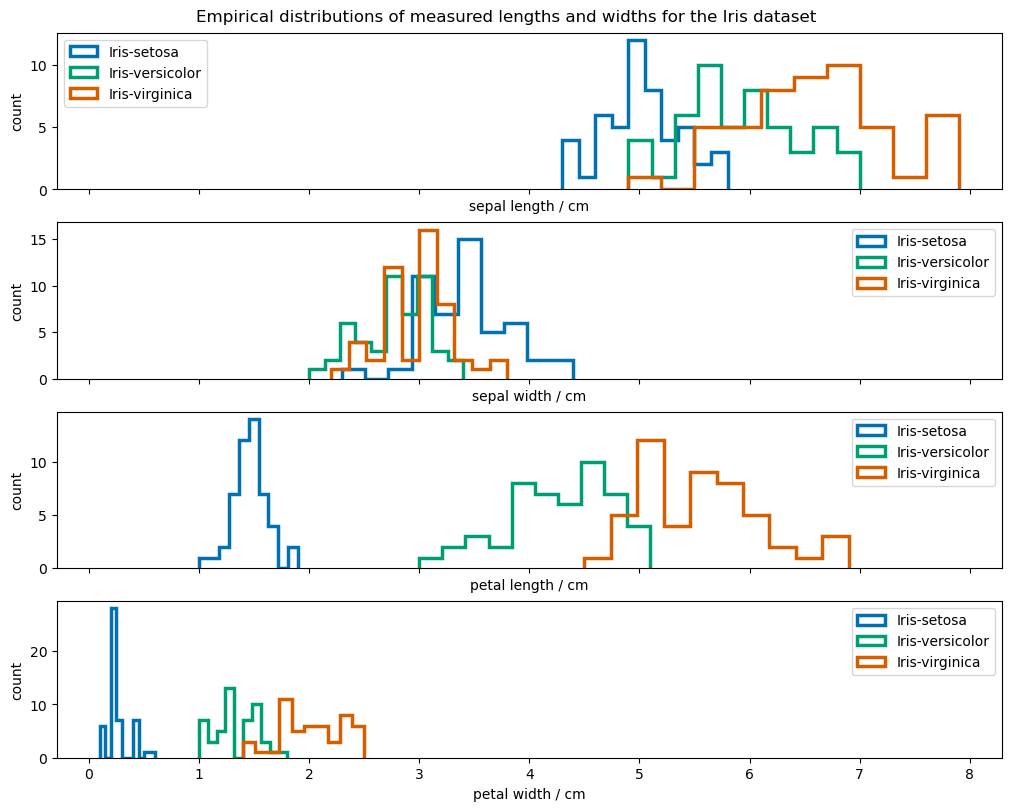

In [61]:
fig, axes = plt.subplot_mosaic(
    np.array(quantities).reshape((-1, 1)),
    layout="constrained",
    sharex=True,
    figsize=(10, 8),
)

fig.suptitle("Empirical distributions of measured lengths and widths for the Iris dataset")

for idx, (quantity, ax) in enumerate(axes.items()):
    for name in np.unique(labels):
        ax.hist(
            measurements[labels == name, idx], # get all values relevant for current Iris flower species
            histtype="step",
            fill=False,
            linewidth=2.5,
            label=name,
        )
        ax.set_xlabel(f"{quantity} / cm")
        ax.set_ylabel("count")
        ax.legend()

Next we ask for the correlation of between different quantities. These can be investigated with scatter plots. We conclude[^correlation-in-depth-requires-species], for instance, that the petal length is *positively* correlated with the petal width, as the latter is increasing when the former is. We might (be tempted to) conclude a slightly *negative* correlation --- although not as clearly visible as for petal length and width --- between the sepal length and the sepal width.

[^correlation-in-depth-requires-species]: We tacitly ignore that this need not be the case for all species. A more in-depth analysis would investigate the correlation for the different species. Refer to the [exercise](exercise-iris-scatter-plots) below to see that we actually are mistaken regarding the negative correlation for sepal length and sepal width.

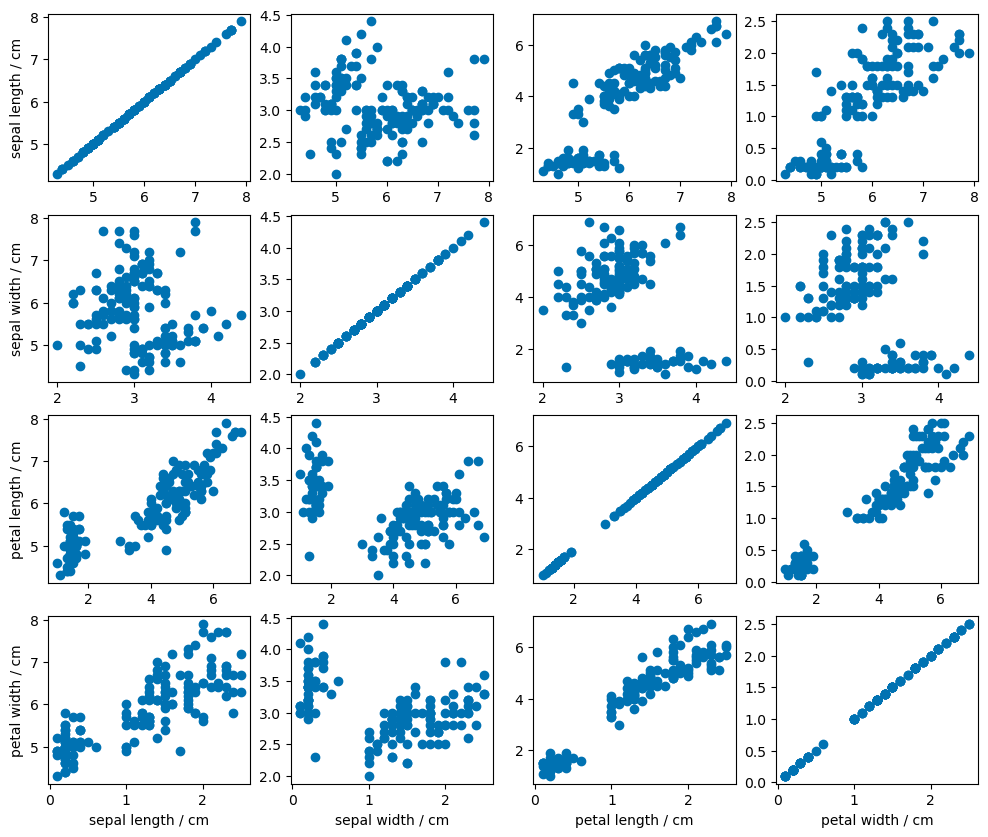

In [62]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(12, 10))

# Scatter plots
for idx1, name1 in enumerate(quantities):
    for idx2, name2 in enumerate(quantities):
        ax = axes[idx1, idx2]
        ax.scatter(measurements[:, idx1], measurements[:, idx2])

# Axis labels
for (axv, axh), name in zip(zip(axes[:, 0], axes[-1, :]), quantities):
    axv.set_ylabel(f"{name} / cm")
    axh.set_xlabel(f"{name} / cm")
    

(exercise-iris-scatter-plots)=
### Exercise

For the Iris dataset create a scatter plot of petal length vs. petal width *and* sepal length and sepal width. Disguish between the differenet species of the Iris plant, Iris-setosa, Iris-versicolor, and Iris-virginica in a suitable manner.

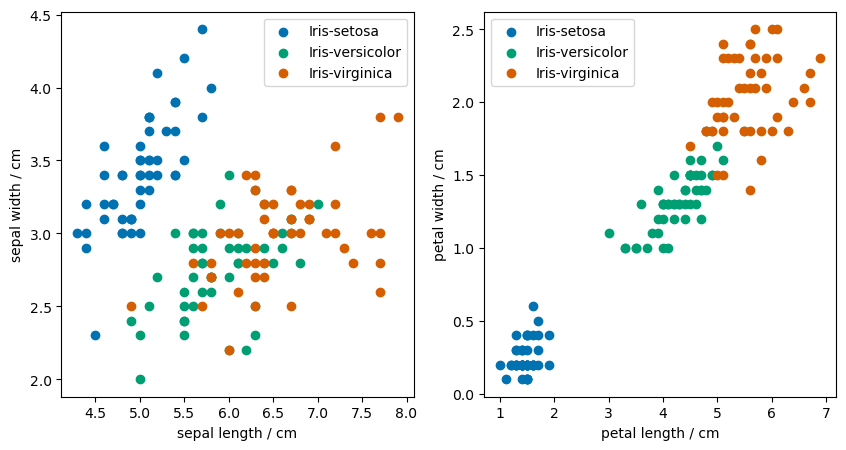

In [63]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.set_xlabel("sepal length / cm")
ax1.set_ylabel("sepal width / cm")

for species in np.unique(labels):
    ax1.scatter(measurements[labels == species, 0], measurements[labels == species, 1], label=species)
ax1.legend()

ax2.set_xlabel("petal length / cm")
ax2.set_ylabel("petal width / cm")

for species in np.unique(labels):
    ax2.scatter(measurements[labels == species, 2], measurements[labels == species, 3], label=species)
ax2.legend()

In [64]:
quantities, np.unique(labels)

(['sepal length', 'sepal width', 'petal length', 'petal width'],
 array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='<U15'))

## Revisited: Logarithmic plots

### Log-Log plots and Log-Linear plots

Plots involving logarithmic scales come in several flavours: Semi-log and Log-Log plots. We have seen an [earlier example](series-plotting-different-orders-of-magnitude) for a Semi-Log (Log-Linear) plot that better displays count values having different orders of magnitude.

Indeed, these types of plots can be helpful for investigating functional relationships inherent to data. In particular, both plotting variants can be used to transform the data such that the plot shows a linear relationship. 

(plotting-log-log)=
#### Log-Log plots

If we have a functional relationship of the form $f(x) = y = a x^m$ we can take the logarithm to base $B$ (any base) on both sides to obtain:

$$
\log_B y = \log_B\left(a x^m\right) = \log_B a + \log_B \left(x^m\right) = \log_B a + m \log_B x 
$$

Setting $Y = \log_B y$, $X = \log_B x$ and $b = \log_B a$ we arrive at a linear equation 

$$
Y = m X + b
$$

with slope $m$ and (log $y$)-axis intercept $b$.


In [65]:
x_values = np.linspace(0.1, 10)


def fpower1(x, a, b):
    return a * x_values**b

We would like to draw you attention to the plot in the middle and the bottom. For the plot in the middle the scales shown on the x-axis and the y-axis are the *same* as in the top plot (no logarithm has been computed here!). The logarithm of the x- and the y-data is computed internally. At the bottom the logarithm of the x- and the y-data has been computed *before* creating the plot. The values shown on the x- and the y-axis there are the *exponents* ($b = \log_{10} 10^{b}$, e.g. $2 = \log_{10} 100 = \log_{10} 10^2$) of the original values as can be inferred by comparing the tick labels of the y-axes of the middle and bottom plot.

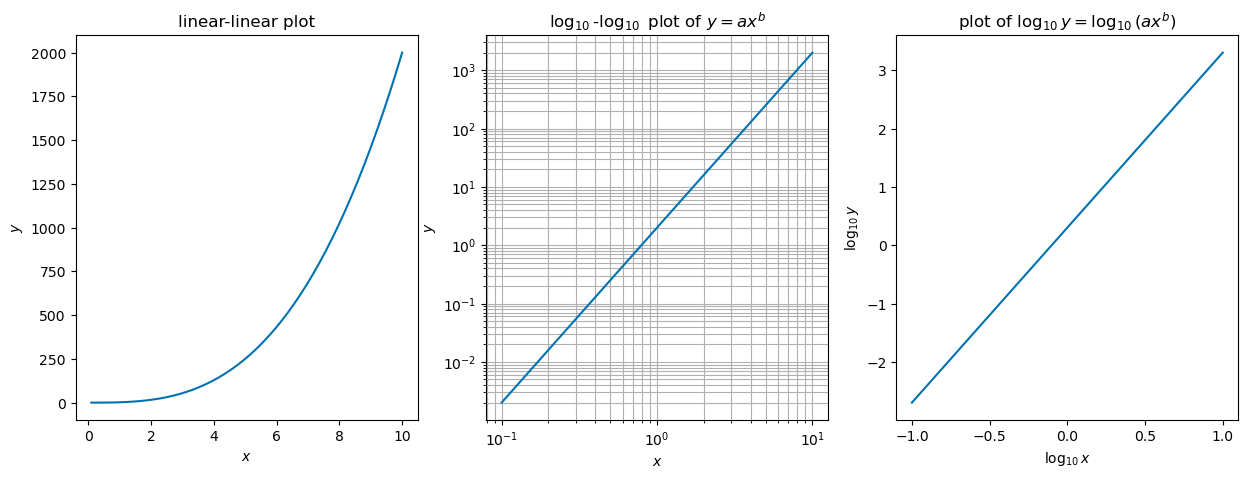

In [66]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

a, b = 2, 3

ax1.set_title(r"linear-linear plot")
ax1.set_xlabel(r"$x$")
ax1.set_ylabel(r"$y$")
ax1.plot(x_values, fpower1(x_values, a, b))

ax2.set_title(r"$\log_{10}$-$\log_{10}$ plot of " + r"$y = a x^b$")
ax2.grid(which="both", axis="both")
ax2.set_xlabel(r"$x$")
ax2.set_ylabel(r"$y$")
ax2.set_xscale("log")
ax2.set_yscale("log")
ax2.plot(x_values, fpower1(x_values, a, b))

ax3.set_title(r"plot of " + r"$\log_{10}y = \log_{10}(a x^b)$")
ax3.set_xlabel(r"$\log_{10}x$")
ax3.set_ylabel(r"$\log_{10}y$")
ax3.set_xscale("linear")
ax3.set_yscale("linear")
ax3.plot(np.log10(x_values), np.log10(fpower1(x_values, a, b)))

Matplotlib offers a the convenience function [`loglog()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.loglog.html) that can be used to generate a Log-Log plot just as in that in the middle subplot of the figure above. 

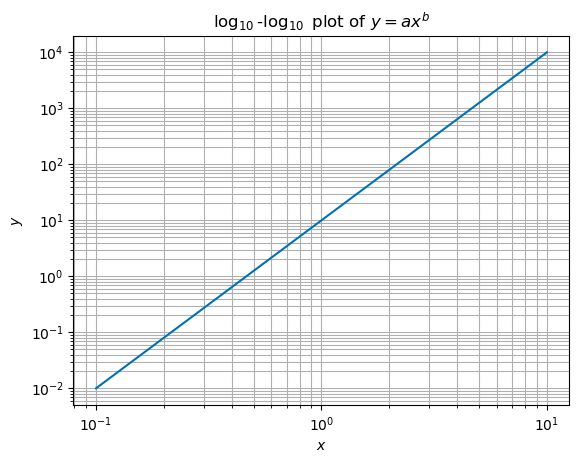

In [78]:
fig, ax = plt.subplots(1, 1)

ax.set_title(r"$\log_{10}$-$\log_{10}$ plot of " + r"$y = a x^b$")
ax.grid(which="both", axis="both")
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.loglog(x_values, fpower1(x_values, a, b))

(plotting-log-linear)=
#### Log-Linear plot

If we have a functional relationship of the form $f(x) = y = \lambda a^{\gamma x}$ we can take the logarithm to base $B$ (any base) on both sides to obtain:

$$
\log_B y = \log_B\left(\lambda a^{\gamma x}\right) = \log_B \lambda + x \gamma \log_B a
$$

Setting $Y = \log_B y$, $m = \gamma \log_Ba$ and $b = \log_B\lambda$ we obtain a linear equation 

$$
Y = m x + b
$$

with slope $m$ and (log $y$)-axis intercept $b$.

In [68]:
x_values = np.linspace(0.1, 10)


def fpower2(x, a, l, g):
    return l * a ** (g * x_values)

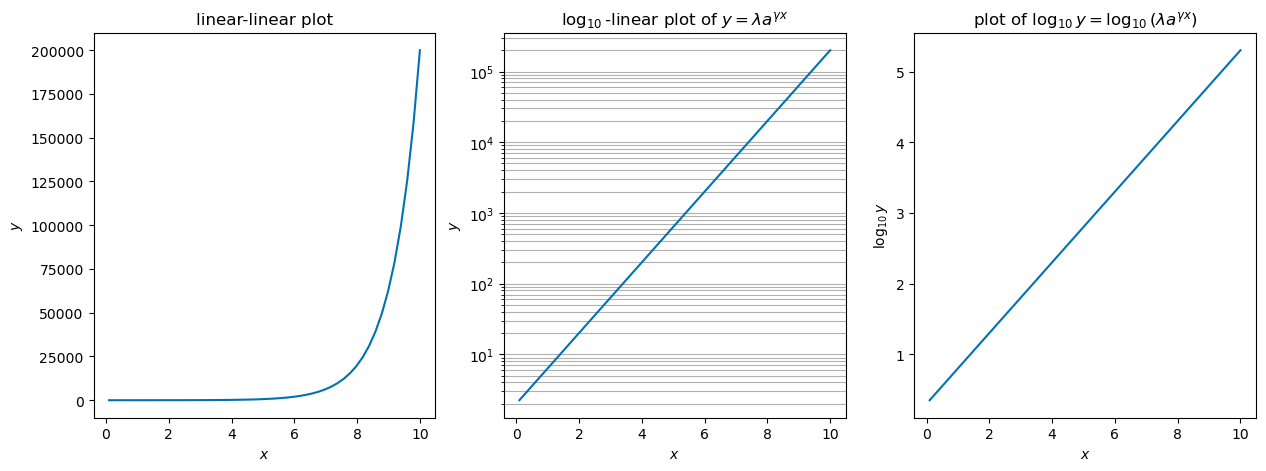

In [69]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

a, l, g = 10, 2, 0.5

ax1.set_title(r"linear-linear plot")
ax1.set_xlabel(r"$x$")
ax1.set_ylabel(r"$y$")
ax1.plot(x_values, fpower2(x_values, a, l, g))

ax2.set_title(r"$\log_{10}$-linear plot of " + r"$y = \lambda a^{\gamma x}$")
ax2.grid(which="both", axis="y")
ax2.set_xlabel(r"$x$")
ax2.set_ylabel(r"$y$")
ax2.set_xscale("linear")
ax2.set_yscale("log")
ax2.plot(x_values, fpower2(x_values, a, l, g))

ax3.set_title(
    "plot of " + r"$\log_{10} y = \log_{10}\left(\lambda a^{\gamma x}\right)$"
)
ax3.set_xlabel(r"$x$")
ax3.set_ylabel(r"$\log_{10} y$")
ax3.set_xscale("linear")
ax3.set_yscale("linear")
ax3.plot(x_values, np.log10(fpower2(x_values, a, l, g)))

Similarly, as for the Log-Log plots, Matplotlib again offers a the convenience function [`semilogy()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.semiglogy.html) that can be used to generate a Log-Linear plot just as in that in the middle subplot of the figure above. 

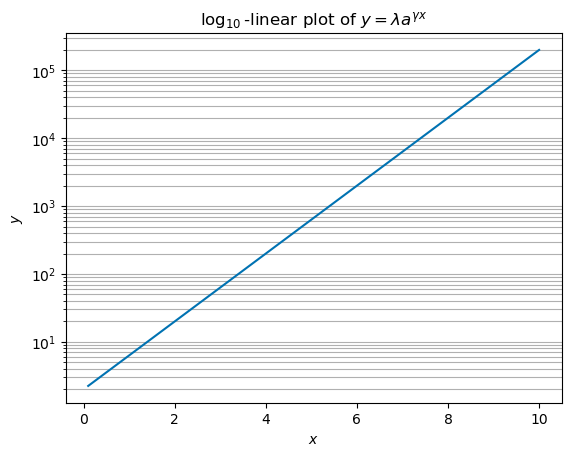

In [76]:
fig, ax = plt.subplots(1, 1)

ax.set_title(r"$\log_{10}$-linear plot of " + r"$y = \lambda a^{\gamma x}$")
ax.grid(which="both", axis="y")
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.semilogy(x_values, fpower2(x_values, a, l, g))

### Exercises

#### Log-Linear plot and linear fit

In this exercise we revisit the [Log-Linear](plotting-log-linear) plot.

Rates $k$ of chemical reactions describe e.g. that rate at which chemical substances --- the reactants --- react to form a product (another chemical substance). They are given in units of $\mathrm{s}^{-1}$. $k$'s dependence on temperature (given in Kelvin $\mathrm{K}$) is given by an equation of the form

$$
k = k_0 \cdot \exp\left(\frac{-E_A}{R T}\right),
$$

where $R$ is a natural constant and $E_A$, and $k_0$ are free parameters that are characteristic for the chemical reaction under investigation.

This equation is suitable for a Log-Linear plot because it resembles the generic form $f(x) = a \cdot b^{\gamma x}$. In this case $b = \mathrm{e}$, Euler's number. The suitable log-function to choose here is the $\ln \equiv \log_\mathrm{e}$ (natural logarithm). Applying $\ln$ to both sides of the latter equation we get

$$
\ln k = 
\ln \left[k_0 \cdot \exp\left(-\frac{E_A}{ R \cdot T}\right)\right] = 
\ln k_0 + \ln\left[\exp\left(-\frac{E_A}{R \cdot T}\right)\right] 
$$

Let's rewrite the last expression a bit to make the next point more clear:

$$
\ln k_0 - \frac{E_A}{R \cdot T} = \ln k_0 - \frac{E_A}{R} \left( \frac{1}{T}\right)
$$

This right-hand side has the form of the right-hand size of a generic linear equation $y = a\cdot x + b$; in our case $a = -\frac{E_A}{R}$, $b = \ln k_0$, and $x = T^{-1}$. Hence, plotting the $\ln k$ vs $T^{-1}$ should yield a line with slope $-\frac{E_A}{R}$ and y-intercept $\ln k_0$.

In the following you will be given data points from a ficticious measurement of $k$ for different temperatures $\vartheta$ (in ${}^{\circ}$C units).

In [71]:
reaction_rates = pd.Series(
    data=(2.52, 5.25, 63, 316),
    index=(190, 199, 230, 251),
)

Visualise the data in a suitable manner.

<Axes: title={'center': 'measured reaction rates'}, xlabel='temperature / ${}^{\\circ}$C', ylabel='k / s$^{-1}$'>

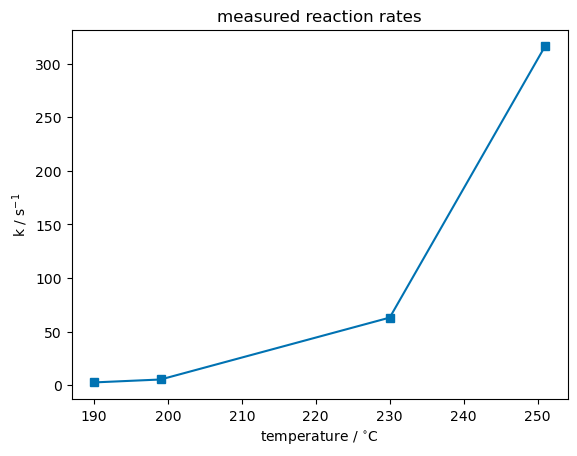

In [84]:
reaction_rates.plot.line(
    title="measured reaction rates",
    xlabel=r"temperature / ${}^{\circ}$C",
    ylabel="k / s$^{-1}$",
    linestyle='-',
    marker='s',
)

Compute $\ln k$ and $1000 \times \frac{1}{T}$ and visualise the results. The additional factor 1000 is chosen to have "nicer looking" values on the x-axis.

:::{warning} Please note the difference here: You are given $\vartheta$ in ${}^{\circ}$C but we want $T$ in K. The relationship is $T / \mathrm{K} = (\vartheta / {}^{\circ}\mathrm{C} + 273)$. Read this as "temperature (in Kelvin units) equals temperature in degree Celsius --- with the unit removed --- plus 273".
:::

<Axes: title={'center': 'measured reaction rates'}, xlabel='inverse temperature / $1000 \\times \\text{K}^{-1}$', ylabel='$\\ln k$'>

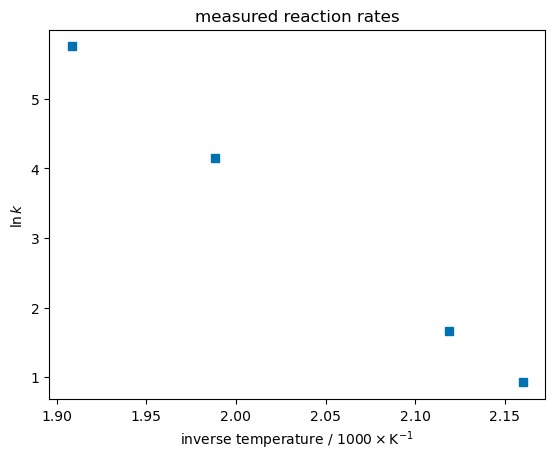

In [90]:
reaction_rates_loged = pd.Series(
    index=1e3 / (reaction_rates.index + 273),
    data=np.log(reaction_rates.to_numpy()),
)

reaction_rates_loged.plot.line(
    title="measured reaction rates",
    xlabel=r"inverse temperature / $1000 \times \text{K}^{-1}$",
    ylabel=r"$\ln k$",
    linestyle='',
    marker='s',
)

Determine the slope and the intercept from a linear fit to the data $\ln k$ ("y-values") and $1000 \times \frac{1}{T}$ ("x-values"). Use the [`Polynomial.fit()`](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.Polynomial.fit.html#numpy.polynomial.polynomial.Polynomial.fit) provided by NumPy.

In [95]:
p = np.polynomial.polynomial.Polynomial.fit(
    reaction_rates_loged.index,
    reaction_rates_loged.to_numpy(),
    deg=1,
)

Visualise the line computed with the slope and intercept from the fit together with the measured data in a suitable manner.

<Axes: title={'center': 'measured reaction rates'}, xlabel='inverse temperature / $1000 \\times \\text{K}^{-1}$', ylabel='$\\ln k$'>

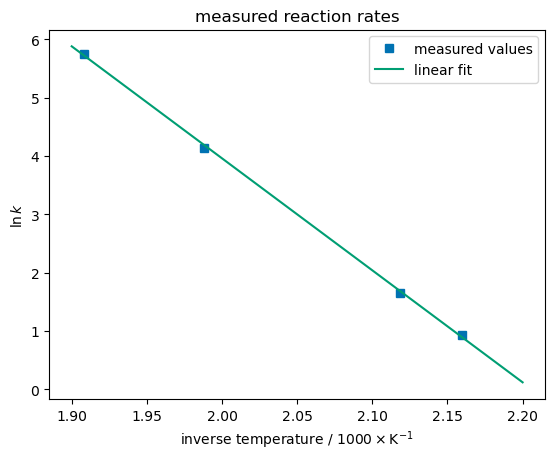

In [99]:
reaction_rates_loged.plot.line(
    title="measured reaction rates",
    xlabel=r"inverse temperature / $1000 \times \text{K}^{-1}$",
    ylabel=r"$\ln k$",
    linestyle='',
    marker='s',
    label="measured values",
    legend=True,
)

tinv_values = np.linspace(1.9, 2.2, 101)

(
    pd.Series(
        index=tinv_values,
        data=p(tinv_values)
    )
    .plot
    .line
    (
        label='linear fit',
        legend=True
    )
)